# Caso de EDA
Nuestro primo **Alan Brito Delgado** se muda a Valencia y esta buscando donde vivir.  
Sus caracteristicas:  
- El primo tiene muy buen ingreso, por lo que el dinero no es problema.  
- Esta obsesionado con correr y hacer ejercicio para mantenerse "fit" y ama la naturaleza. Sin embargo, odia los gimnasios, por lo que a lo que da mas importancia es a tener naturaleza cerca donde ir a entrenar, correr, caminar, etc.  
- El primo da mucha importancia a que hayan cargadores de coches eléctricos cerca, ya que solo tiene este tipo de coche.  
  
Por lo anterior nos hemos puesto a hacer un EDA para ayudarle a elegir en que barrio vivir.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [80]:
!pip install folium

In [28]:
# Subida de datos
zonas_verdes = pd.read_excel("espais-verds-espacios-verdes.xlsx")
zonas_verdes.head(10)

,OBJECTID,Id Jardí / Id. Jardín,Nom / Nombre,Barri / Barrio,Tipologia / Tipología,Àrea / Área,Número Elementos Fitness,Superficie Huerto Urbano,Zona,DM,Ud. Gestion,geo_shape,geo_point_2d
0,2257,99101520,Alfahuir C,SANT LLORENS,Bulevar,26787.712283,NaN,NaN,NORTE,RASCANYA,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.363266130275781,39.49111...","39.491053673306524, -0.3630558058944522"
1,2261,99101616,Vicente Badia i Marin (Cronista Valencià) Pl,BENICALAP,Jardines Barrio Plaza,3640.849070,NaN,NaN,NORTE,BENICALAP,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.382451950192398,39.49753...","39.49766248854052, -0.38225423929120783"
2,2262,99100601,Alameda Pso,MESTALLA,Jardines Especial Protección,53044.252161,NaN,NaN,NORTE,PLA DEL REIAL,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.366173370513302,39.47618...","39.47308874847026, -0.36435137030540027"
3,2265,99100528,Doctor Olóriz C - Vicente Peris C,TORMOS,Acompañamiento Viario,400.905788,NaN,NaN,NORTE,LA SAIDIA,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.381792190303125,39.48962...","39.48936563955395, -0.38172696658101457"
4,2266,99101816,Senda Secanet (Rotonda),BENIMAMET,Jardines Barrio Plaza,248.243130,NaN,NaN,NORTE,POBLATS DE L`OEST,SJ JARDINES NORTE,"{""coordinates"":[[[-0.422039159605328,39.500128...","39.50013111583329, -0.42214315089953613"
5,2270,99100506,Sagunto C - Maximiliano Thous C,SANT ANTONI,Acompañamiento Viario,1205.898539,NaN,NaN,NORTE,LA SAIDIA,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.375311249626067,39.48797...","39.48790942823897, -0.37543388312333215"
6,2274,99100454,Jorge Comín (Metge Pediatra) C,SANT PAU,Jardines Barrio Plaza,7088.545809,NaN,NaN,NORTE,CAMPANAR,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.404818729894837,39.47964...","39.47970372023523, -0.4043924016351774"
7,2281,99101418,Emilio Baró Av - Masquefa C,CAMI DE VERA,Jardines Barrio Plaza,1235.238817,NaN,NaN,NORTE,BENIMACLET,SJ JARDINES NORTE,"{""coordinates"":[[[[-0.358830700258243,39.49157...","39.491970634601635, -0.35857114619500535"
8,2291,99101212,Marino Albesa C - Industria C,AIORA,Jardines Barrio Plaza,3044.556624,NaN,NaN,NORTE,CAMINS AL GRAU,SJ JARDINES NORTE,"{""coordinates"":[[[-0.343908390568486,39.464902...","39.46510688421944, -0.3435174794592474"
9,2292,99101405,Iglesia de Benimaclet Pl,BENIMACLET,Acompañamiento Viario,128.055005,NaN,NaN,NORTE,BENIMACLET,SJ JARDINES NORTE,"{""coordinates"":[[[-0.359165990261558,39.486330...","39.48637203687835, -0.35922656520029106"


In [29]:
# Limpieza
zonas_verdes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  772 non-null    int64  
 1   Id Jardí / Id. Jardín     772 non-null    int64  
 2   Nom / Nombre              772 non-null    object 
 3   Barri / Barrio            771 non-null    object 
 4   Tipologia / Tipología     771 non-null    object 
 5   Àrea / Área               772 non-null    float64
 6   Número Elementos Fitness  372 non-null    float64
 7   Superficie Huerto Urbano  372 non-null    float64
 8   Zona                      772 non-null    object 
 9   DM                        771 non-null    object 
 10  Ud. Gestion               772 non-null    object 
 11  geo_shape                 772 non-null    object 
 12  geo_point_2d              770 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 78.5+ KB


In [64]:
# Lo ordenamos
zonas_verdes = zonas_verdes.sort_values("OBJECTID").reset_index(drop=True)

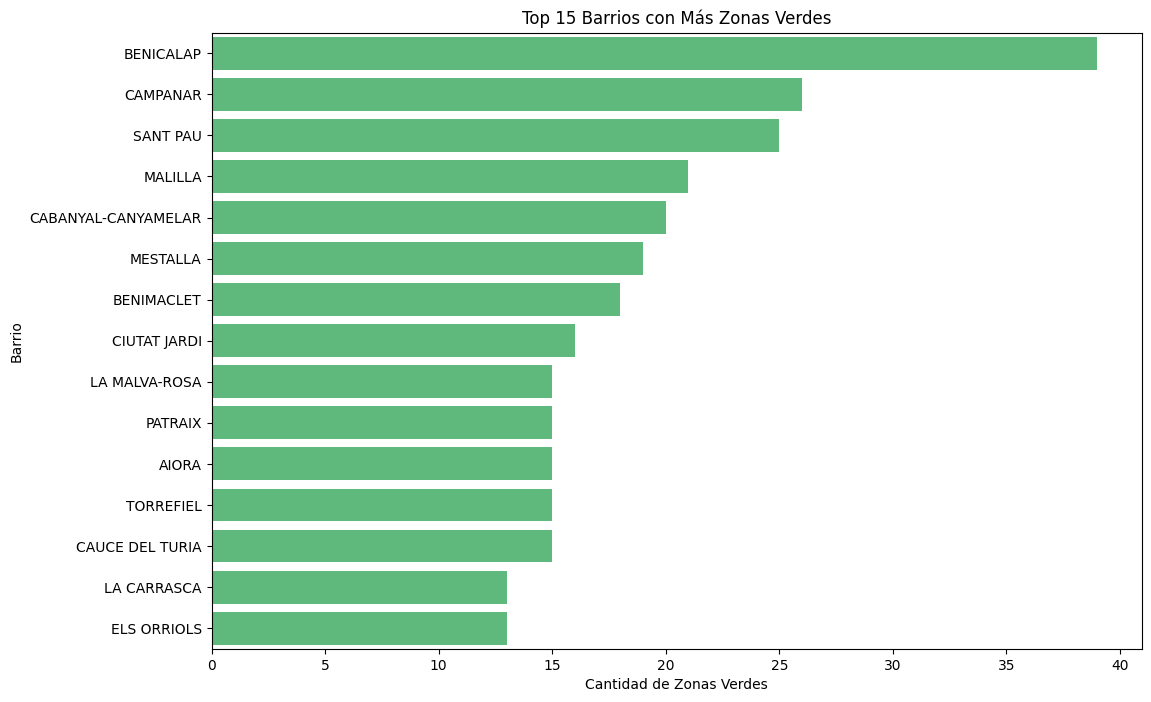

In [71]:
# Obtenemos el conteo de zonas verdes para los 15 barrios principales
top_15_barrios = zonas_verdes["Barri / Barrio"].value_counts().head(15)

# Configuramos el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_barrios.values, y=top_15_barrios.index,color="#50C878")

# Etiquetas y título
plt.xlabel("Cantidad de Zonas Verdes")
plt.ylabel("Barrio")
plt.title("Top 15 Barrios con Más Zonas Verdes")
plt.show()


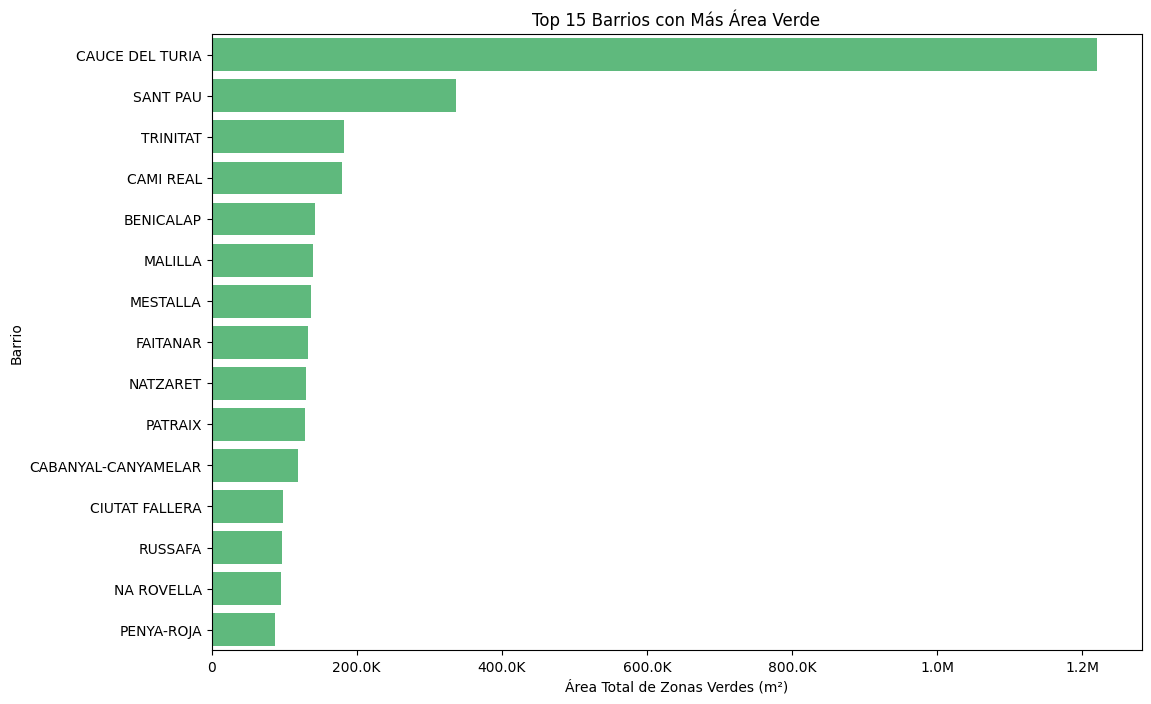

In [69]:
from matplotlib.ticker import FuncFormatter

# Calculamos el área total de zonas verdes por barrio
top_15_area_barrios = zonas_verdes.groupby("Barri / Barrio")["Àrea / Área"].sum().sort_values(ascending=False).head(15)

# Función para formatear los números en el eje x
def format_num(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'  # Formato en millones
    elif x >= 1_000:
        return f'{x / 1_000:.1f}K'  # Formato en miles
    else:
        return f'{x:.0f}'  # Formato normal

# Configuramos el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_area_barrios.values, y=top_15_area_barrios.index,color="#50C878")

# Aplicamos el formateador al eje x
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_num))

# Etiquetas y título
plt.xlabel("Área Total de Zonas Verdes (m²)")
plt.ylabel("Barrio")
plt.title("Top 15 Barrios con Más Área Verde")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27188\653016605.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


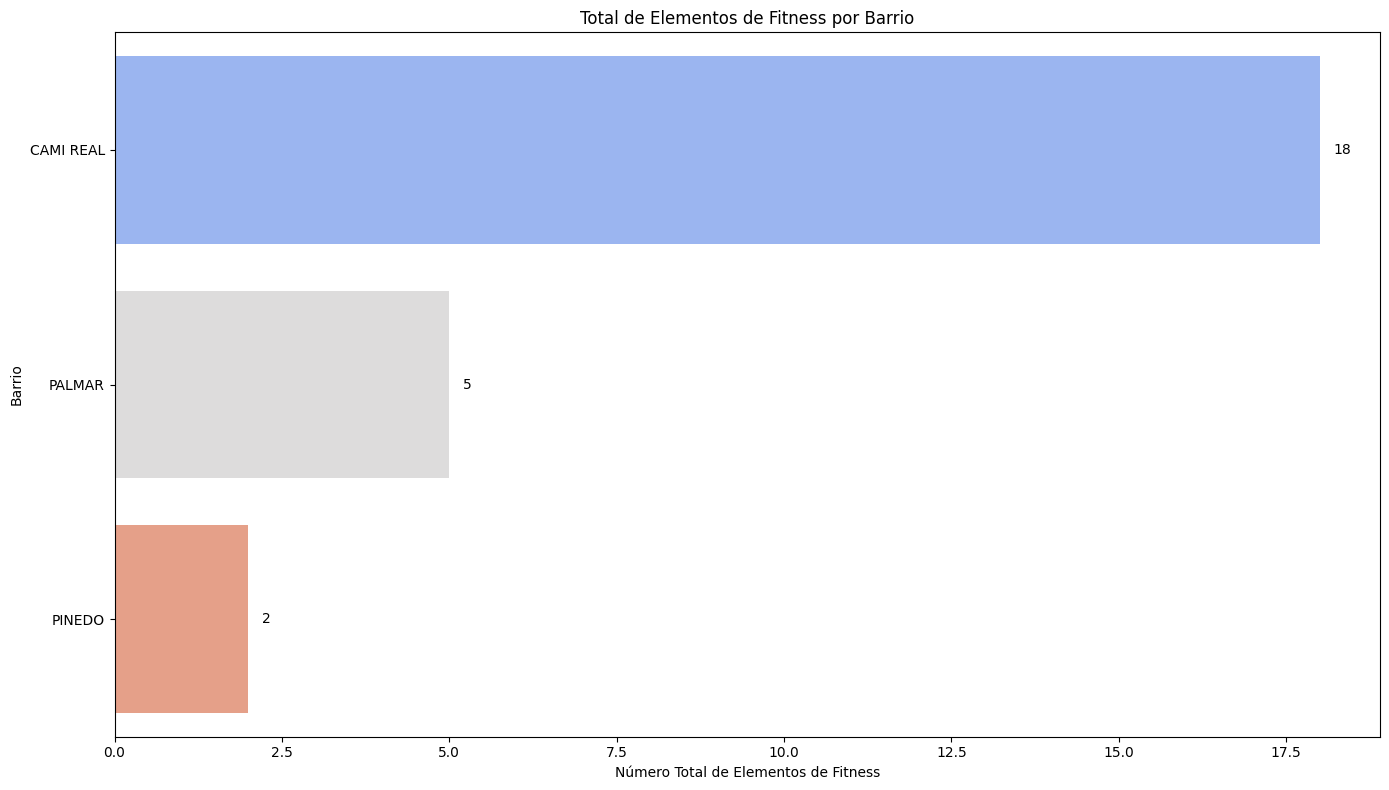

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de cargar los datos correctamente
df_spacio_fitness = pd.read_excel("espais-verds-espacios-verdes.xlsx")

# Filtrar datos para incluir solo las zonas con instalaciones de fitness (valores mayores que cero)
filtered_fitness_zones = df_spacio_fitness[(df_spacio_fitness["Número Elementos Fitness"].notna()) & 
                                           (df_spacio_fitness["Número Elementos Fitness"] > 0)]

# Agrupar por 'Barri / Barrio' y sumar el número de elementos de fitness en cada barrio
fitness_elements_by_zone_filtered = filtered_fitness_zones.groupby("Barri / Barrio")["Número Elementos Fitness"].sum()

# Crear la figura y el gráfico, utilizando un estilo curvado y gráfico de barras horizontal
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=fitness_elements_by_zone_filtered.values, 
    y=fitness_elements_by_zone_filtered.index, 
    palette="coolwarm"
)

# Añadir valores encima de cada barra
for index, value in enumerate(fitness_elements_by_zone_filtered.values):
    ax.text(value + 0.2, index, f'{value:.0f}', va='center')

# Ajustar el diseño y añadir etiquetas
plt.title("Total de Elementos de Fitness por Barrio")
plt.xlabel("Número Total de Elementos de Fitness")
plt.ylabel("Barrio")
plt.tight_layout()  # Ajuste para evitar recortes en el diseño
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27188\2374242375.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Àrea / Área"] = pd.to_numeric(filtered_data["Àrea / Área"], errors='coerce')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_27188\2374242375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Número Elementos Fitness"] = pd.to_numeric(filtered_data["Número Elementos Fitness"], errors='coerce')


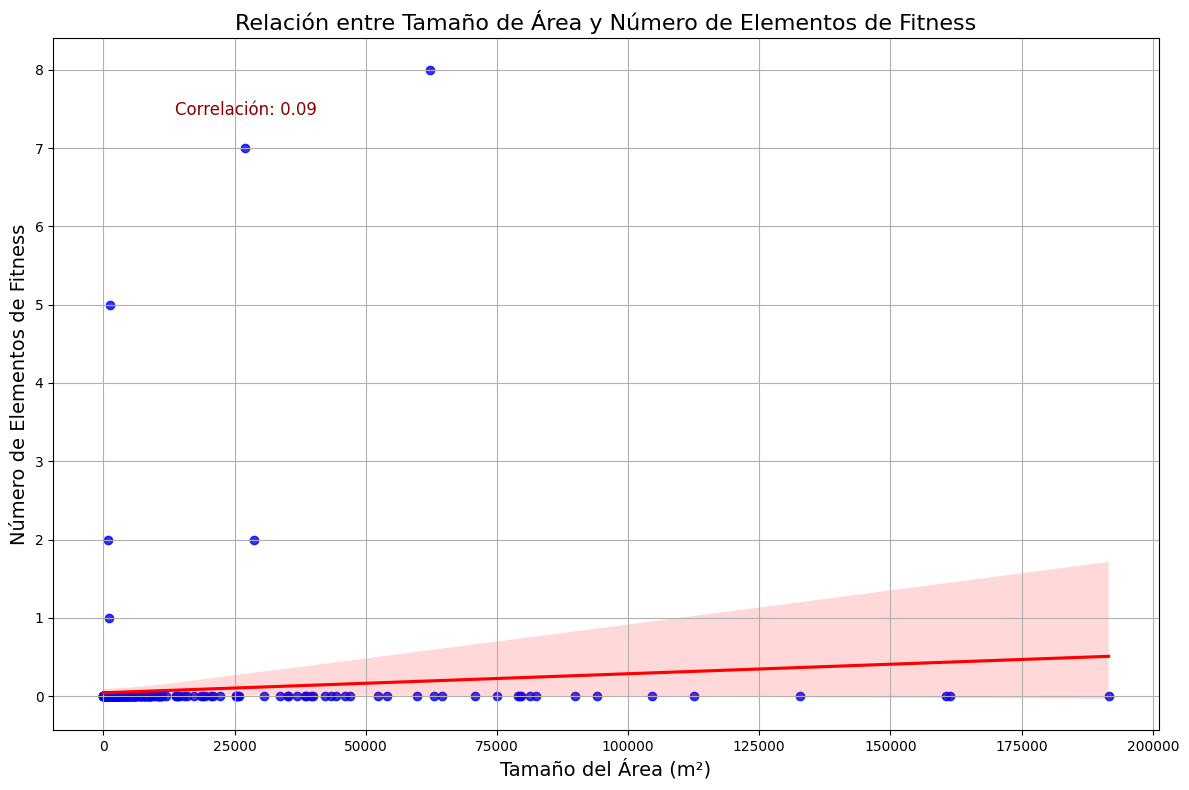

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
df_spacio_fitness = pd.read_excel("espais-verds-espacios-verdes.xlsx")

# Filtrar el DataFrame para incluir solo registros con valores no nulos en "Àrea / Área" y "Número Elementos Fitness"
filtered_data = df_spacio_fitness[(df_spacio_fitness["Àrea / Área"].notna()) & 
                                  (df_spacio_fitness["Número Elementos Fitness"].notna())]

# Convertir las columnas a tipo numérico para asegurar que se pueden analizar
filtered_data["Àrea / Área"] = pd.to_numeric(filtered_data["Àrea / Área"], errors='coerce')
filtered_data["Número Elementos Fitness"] = pd.to_numeric(filtered_data["Número Elementos Fitness"], errors='coerce')

# Crear el gráfico con una línea de regresión para mayor claridad
plt.figure(figsize=(12, 8))
sns.regplot(data=filtered_data, x="Àrea / Área", y="Número Elementos Fitness", color="blue", line_kws={"color": "red"})
plt.title("Relación entre Tamaño de Área y Número de Elementos de Fitness", fontsize=16)
plt.xlabel("Tamaño del Área (m²)", fontsize=14)
plt.ylabel("Número de Elementos de Fitness", fontsize=14)

# Añadir la correlación en el gráfico
correlation = filtered_data["Àrea / Área"].corr(filtered_data["Número Elementos Fitness"])
plt.figtext(0.15, 0.85, f'Correlación: {correlation:.2f}', fontsize=12, color="darkred")

# Ajustes adicionales para mejorar la legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()


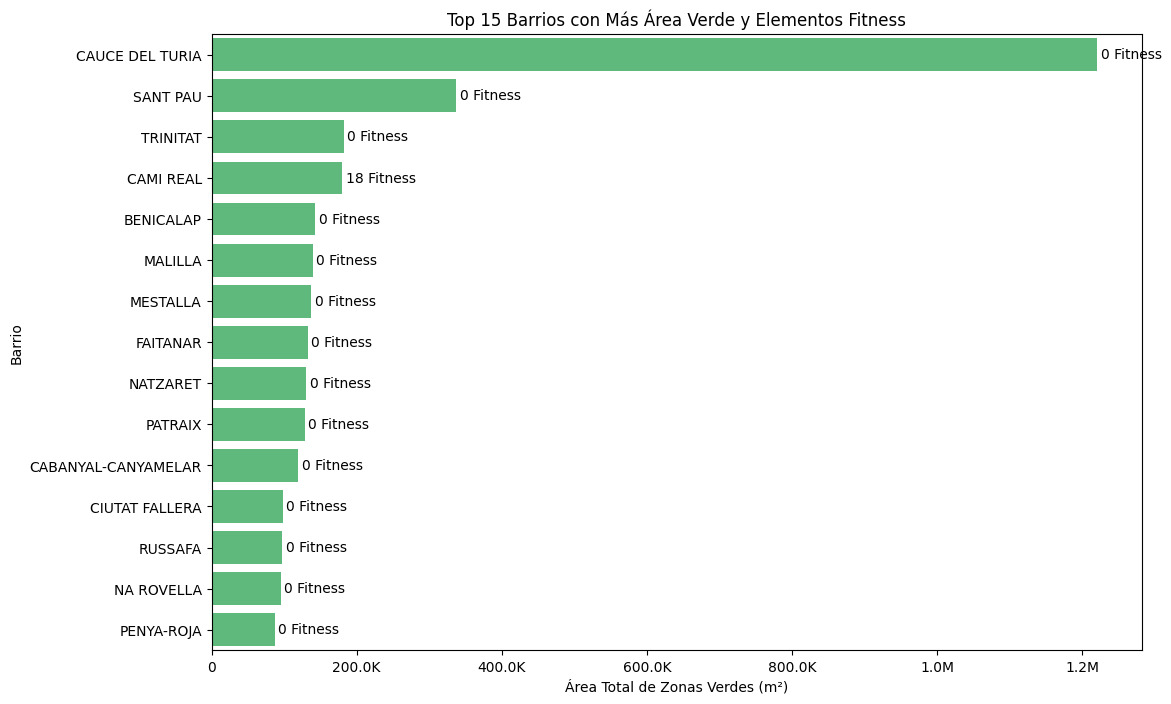

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Calculamos el área total y la suma de elementos fitness para los 15 barrios principales
top_15_area_barrios = zonas_verdes.groupby("Barri / Barrio").agg({
    "Àrea / Área": "sum",
    "Número Elementos Fitness": "sum"
}).sort_values(by="Àrea / Área", ascending=False).head(15)

# Función para formatear los números en el eje x
def format_num(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'  # Formato en millones
    elif x >= 1_000:
        return f'{x / 1_000:.1f}K'  # Formato en miles
    else:
        return f'{x:.0f}'  # Formato normal

# Configuramos el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_area_barrios["Àrea / Área"], y=top_15_area_barrios.index, color="#50C878")

# Aplicamos el formateador al eje x
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_num))

# Añadimos etiquetas de la cantidad de elementos fitness con un pequeño desplazamiento
for index, value in enumerate(top_15_area_barrios["Àrea / Área"]):
    fitness_elements = top_15_area_barrios["Número Elementos Fitness"].iloc[index]
    plt.text(value + 5000, index, f'{int(fitness_elements)} Fitness',  # Ajuste de distancia con +5000
             va='center', ha='left', color="black")

# Etiquetas y título
plt.xlabel("Área Total de Zonas Verdes (m²)")
plt.ylabel("Barrio")
plt.title("Top 15 Barrios con Más Área Verde y Elementos Fitness")
plt.show()



In [83]:
green_spaces_df = zonas_verdes.copy()
# Step 1: Extract latitude and longitude from geo_point_2d column
# Splitting the coordinates into latitude and longitude
green_spaces_df[['latitude', 'longitude']] = green_spaces_df['geo_point_2d'].str.split(',', expand=True)
green_spaces_df['latitude'] = green_spaces_df['latitude'].astype(float)
green_spaces_df['longitude'] = green_spaces_df['longitude'].astype(float)

# Step 2: Group by neighborhoods and calculate total green area
neighborhood_green_area = green_spaces_df.groupby('Barri / Barrio').agg({
    'Àrea / Área': 'sum',  # Summing up the green area for each neighborhood
    'latitude': 'mean',     # Mean latitude for central positioning in map
    'longitude': 'mean'     # Mean longitude for central positioning in map
}).reset_index()

# Step 3: Create a Folium map centered on Valencia
valencia_map = folium.Map(location=[39.4699, -0.3763], zoom_start=12)

# Step 4: Adding neighborhoods as circle markers to the map with color based on green area size
for _, row in neighborhood_green_area.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=8,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"{row['Barri / Barrio']}: {row['Àrea / Área']:.2f} m² of green area"
    ).add_to(valencia_map)

# Save the map to an HTML file
valencia_map_path = r'C:\Users\Usuario\OneDrive\Documentos\THE BRIDGE\TRABAJO\MiniEDA\valencia_green_area_map.html'
valencia_map.save(valencia_map_path)

valencia_map.save(valencia_map_path)

valencia_map_path

'C:\\Users\\Usuario\\OneDrive\\Documentos\\THE BRIDGE\\TRABAJO\\MiniEDA\\valencia_green_area_map.html'

In [88]:
pd.read_csv(r'carregadors-vehicles-electrics-cargadores-vehiculos-electricos.csv', delimiter=';')
df_puntos_de_carga  = pd.read_csv(r'carregadors-vehicles-electrics-cargadores-vehiculos-electricos.csv', delimiter=';')

In [89]:
# Re-apply data cleaning steps: fill missing values and extract latitude and longitude
df_puntos_de_carga[['latitude', 'longitude']] = df_puntos_de_carga['geo_point_2d'].str.split(',', expand=True)
df_puntos_de_carga['latitude'] = pd.to_numeric(df_puntos_de_carga['latitude'], errors='coerce')
df_puntos_de_carga['longitude'] = pd.to_numeric(df_puntos_de_carga['longitude'], errors='coerce')

# Create a folium map centered on Valencia
valencia_charging_map = folium.Map(location=[39.4699, -0.3763], zoom_start=12)

# Plot each charging station on the map as a marker
for _, row in df_puntos_de_carga.iterrows():
    folium.Marker(
        location=(row['latitude'], row['longitude']),
        popup=f"{row['Emplazamiento']} - {row['Potencia']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(valencia_charging_map)

# Save the map to an HTML file
charging_map_path = r'C:\Users\Usuario\OneDrive\Documentos\THE BRIDGE\TRABAJO\MiniEDA\valencia_charging_stations_map.html'
valencia_charging_map.save(charging_map_path)

charging_map_path

'C:\\Users\\Usuario\\OneDrive\\Documentos\\THE BRIDGE\\TRABAJO\\MiniEDA\\valencia_charging_stations_map.html'